# Machine Learning - Bonds Price Segmentation


### Import Relevant Modules


In [16]:

import numpy as np
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [17]:
sns.set(color_codes=True)


### Synopsys

The data-points were sampled in intervals of 30 days each and the mean value and standard deviation of the difference between the final value and initial value throughout a progressive number of intervals extracted.

This dataset ($\bar{x}$,$\delta$) was clustered through DBSCAN for different pairs of hyperparameters.
Calculated persistence, the percentage number of ($\bar{x}$,$\delta$) pairs that stay in the same cluster between one interval and the next, has been compared to a Von Mises distribution.

Small k values indicate uniform distributions, Eps equal to 0.075 and min_sample equal to 11 give the lowest k value and therefore the most time tolerant clustering aggregation.




### Create a pandas dataframe


In [18]:
import pandas as pd

In [19]:
## data storage: ClusteringProject
df=pd.read_csv("./clusteringproject.csv")
df.set_index('date')
df.head(5)

date       n1       n4       n5       n6       n7      n10      n11  \
0   d1  120.370  103.701  101.565  100.856  100.326  111.735  101.094   
1   d2  120.210  103.667  101.387  100.652  100.158  111.685  101.091   
2   d3  120.240  103.681  101.484  100.751  100.228  111.690  101.105   
3   d4  120.070  103.639  101.374  100.641  100.130  111.620  101.113   
4   d5  120.165  103.646  101.465  100.778  100.227  111.640  101.149   

       n12      n13  ...     n250     n251     n252     n253    n254     n255  \
0  102.522  103.903  ...  102.778  101.933  101.096  101.420  99.892  100.099   
1  102.504  103.854  ...  102.641  101.841  101.010  101.302  99.881  100.128   
2  102.510  103.860  ...  102.688  101.864  101.044  101.339  99.898  100.128   
3  102.473  103.832  ...  102.615  101.816  100.970  101.283  99.934  100.125   
4  102.484  103.862  ...  102.696  101.859  101.010  101.333  99.971  100.153   

      n256     n257     n260     n261  
0  102.925  100.122  101.601  103.022  
1  102.707  100.137  101.451  102.775  
2  102.828  100.102  101.478  102.892  
3  102.710  100.129  101.331  102.783  
4  102.853  100.235  101.502  102.908  

[5 rows x 201 columns]

In [20]:
## remove n1
data=df[df.columns[2:]].T ;

### __Dataset divided in subsets of 30 days__ 




In [21]:
interval=30
steps=np.arange(1,17,1)
start=steps*interval
stop=steps*interval+interval
s=(start,stop)

In [22]:
### training data

window0=data.iloc[:,0:interval].T
window1=data.iloc[:,start[0]:stop[0]].T
window2=data.iloc[:,start[1]:stop[1]].T
window3=data.iloc[:,start[2]:stop[2]].T
window4=data.iloc[:,start[3]:stop[3]].T
window5=data.iloc[:,start[4]:stop[4]].T
window6=data.iloc[:,start[5]:stop[5]].T
window7=data.iloc[:,start[6]:stop[6]].T
window8=data.iloc[:,start[7]:stop[7]].T
window9=data.iloc[:,start[8]:stop[8]].T
window10=data.iloc[:,start[9]:stop[9]].T
window11=data.iloc[:,start[10]:stop[10]].T
window12=data.iloc[:,start[11]:stop[11]].T
window13=data.iloc[:,start[12]:stop[12]].T
window14=data.iloc[:,start[13]:stop[13]].T
window15=data.iloc[:,start[14]:stop[14]].T
window16=data.iloc[:,start[15]:stop[15]].T

In [23]:
window0.head()


n4       n5       n6       n7      n10      n11      n12      n13  \
0  103.701  101.565  100.856  100.326  111.735  101.094  102.522  103.903   
1  103.667  101.387  100.652  100.158  111.685  101.091  102.504  103.854   
2  103.681  101.484  100.751  100.228  111.690  101.105  102.510  103.860   
3  103.639  101.374  100.641  100.130  111.620  101.113  102.473  103.832   
4  103.646  101.465  100.778  100.227  111.640  101.149  102.484  103.862   

       n14      n15  ...     n250     n251     n252     n253    n254     n255  \
0  105.596  127.270  ...  102.778  101.933  101.096  101.420  99.892  100.099   
1  105.537  127.175  ...  102.641  101.841  101.010  101.302  99.881  100.128   
2  105.550  127.705  ...  102.688  101.864  101.044  101.339  99.898  100.128   
3  105.517  127.445  ...  102.615  101.816  100.970  101.283  99.934  100.125   
4  105.549  127.370  ...  102.696  101.859  101.010  101.333  99.971  100.153   

      n256     n257     n260     n261  
0  102.925  100.122  101.601  103.022  
1  102.707  100.137  101.451  102.775  
2  102.828  100.102  101.478  102.892  
3  102.710  100.129  101.331  102.783  
4  102.853  100.235  101.502  102.908  

[5 rows x 199 columns]

## DBSCAN

Optimization of hyperparameters

In [24]:
def showclusters(d,mu,labels,indx=None):
    ##graphical output
    fig, ax = plt.subplots(figsize=(8,6))
    x=d.values
    y=mu.values
    ax.scatter(x,y,c=labels,marker='o',s=50,cmap='gnuplot_r')
    plt.xlabel("std dev")
    plt.ylabel("mean")
    plt.xlim(-0.5, 3)
    plt.ylim(-1, 0.5)
    ax.annotate(str(indx), (0, 0.4))
    ax.legend()
    if indx is not None:
        plt.savefig('./img'+str(indx)+'.png')
    return None
#for i, txt in enumerate(index):
#    ax.annotate(txt, (x[i], y[i]))
##abs(Labels["0.125-11"])

In [25]:
def runDBSCAN(eps=0.15,min_samples=9,animation=None):
    ## this function can be further optimized some objects are recalculated each for loop (deltaframe,dimension)
    from collections import defaultdict
    from sklearn.cluster import  DBSCAN
    DBSCAN=DBSCAN(eps,min_samples)
    persistence=[]
    ## initial values from the first five intervals
    wf=[0,1,2,3,4]
    jj=4
    frames=[]
    file = open('./ImgList.txt', 'w')
    while jj <= 16:
        delta=defaultdict(list)
        for j in wf:
            w=eval("window"+str(j))
            for i in sorted(list(w.keys())):
                col=w[i]
                d=col.iloc[-1]-col.iloc[0]
                delta[i].append(d)
        
        
        deltaframe=pd.DataFrame.from_dict(delta,orient='index')
        d=deltaframe.T.std()
        mu=deltaframe.T.mean()
        index=(deltaframe.index)
        dt=np.column_stack((d.values,mu.values))
        ##print(dt)
        Xtrain=dt
        

        labels = DBSCAN.fit_predict(Xtrain)

        persistence.append(labels)
        jj=jj+1
        wf.append(jj)
       
        if animation is not None:
            if str(e)+"-"+str(s)== animation:
                showclusters(d,mu,labels,jj)
                item="img+"+str(jj)+".png"
                file.write(item+"\n")
        
        dimension=Xtrain.shape[0]
        dimension
        
    file.close()
    return persistence,labels,dimension,deltaframe,index,frames

In [27]:
## main for loops 
eps=[0.05,0.075,0.1,0.125,0.15]
samples=[7,8,9,10,11,12]
Results = {}
Labels={}
for e in eps:
    for s in samples:
        persistance,label,dimension,deltaframe,index,frames=runDBSCAN(e,s)
        p=np.vstack(persistance)
        x=[]
        y=[]
        wf=[1,2,3,4,5,6,7,8,9,10,11,12]
        for j in wf:
            c=np.unique(p[j-1])
            cc=np.unique(p[j])
            ##print(c,cc)
            ### assert the same number of clusters
            if len(c)==len(cc):
                y.append(np.count_nonzero(p[j-1]-p[j]))
            else:
                y.append(100)
        
        indx=str(e)+"-"+str(s)
        x=[(interval*x) for x in wf]
        y=[100*x / dimension for x in y]
      
        Results[indx] =y 
        Labels[indx]=label



TypeError: __init__() takes from 1 to 2 positional arguments but 3 were given

### Dataframe with % of not persistent

In [15]:
results=pd.DataFrame(Results)
results


0.05-10  0.05-11  0.05-12  0.05-7  0.05-8  0.05-9  0.075-10  0.075-11  \
0        12        1       50      50      50      50        27        50   
1        16       13       50      50      13      50        50        50   
2         3       50        1      50      50      50        50        50   
3         2       50        0      22      13       1        50        50   
4         0       50        1      26       3      50        50        50   
5         1        0        0      50      10       4        50        50   
6         3       50        0      50       8       3        50        45   
7        50        1        1      31      50       2        50         4   
8         2       50        0      50      50       1         3         3   
9         1       50        0      50      50      50         0         1   
10        0       50       50      50      50      50         0         0   
11        1        2        0      18      50      50        50         3   

    0.075-12  0.075-7   ...     0.125-12  0.125-7  0.125-8  0.125-9  0.15-10  \
0         50       50   ...           26       50       50       16       50   
1         50       50   ...           17        4       50       50        3   
2         50        2   ...           12       11       50       50       50   
3         50       50   ...           50        5       50       50        3   
4          9       50   ...            4        1       50       10        2   
5         50       50   ...            3        2       50        9        0   
6         50       50   ...            2        1       50       50        0   
7          4       50   ...            1       50       16       50        1   
8          1        3   ...           50       50        2       50        0   
9          1        1   ...            1       50        1        1        0   
10         0       50   ...           50       50       50       50        1   
11        50       14   ...            1        1       50       50        0   

    0.15-11  0.15-12  0.15-7  0.15-8  0.15-9  
0        50       50      50      50      50  
1         2        3      15      50       3  
2        50       50       4      50      12  
3         5        7       2       3       3  
4         3       50      50      50       1  
5         1       50       0      50       0  
6         1        2       0      50       0  
7         0        2       0       0       1  
8         1        1       0       0      50  
9         0        0       0       0      50  
10        1        0      50      50      50  
11        0        2       0       0       0  

[12 rows x 30 columns]

Fit the data with a __von Mises distribution__,
looking for the smallest k-value which indicates uniform distribution

In [16]:
import scipy.stats as stat
for c in list(results.columns.values):
    k, t, _ = stat.vonmises.fit(results[c], fscale = 1)
    ## n of clusters, hyperparmeters, k 
    print(len(np.unique(Labels[c])),c,k,t)
              

(4, '0.05-10', 0.68931433091005134, 7.4154029625535358)
(3, '0.05-11', 2.6814471939612226, 31.541318744667898)
(3, '0.05-12', 4.7869116995468843, 12.730094681328953)
(6, '0.05-7', 2.582935798306373, 43.709642740862634)
(6, '0.05-8', 1.327997121767861, 31.353891072608103)
(7, '0.05-9', 1.1022204474660948, 31.440112749380745)
(3, '0.075-10', 2.0644283099205385, 37.580962702411696)
(4, '0.075-11', 0.97144566184069858, 31.347781047695037)
(4, '0.075-12', 1.5459775928208108, 31.347494944118736)
(6, '0.075-7', 1.4604741462092283, 37.81072862227623)
(5, '0.075-8', 1.025557330450801, 31.791323506769007)
(4, '0.075-9', 1.2750085046567396, 37.510697815799048)
(4, '0.1-10', 2.7461846135556311, 31.157629509114855)
(5, '0.1-11', 0.82299029145244706, 25.656372389717468)
(3, '0.1-12', 0.95845054209826896, 1.1812966470927402)
(4, '0.1-7', 2.1051547471327439, 37.687790145253096)
(5, '0.1-8', 1.8538475479303369, 37.466944787235725)
(5, '0.1-9', 0.97554962784532195, 18.842844853733048)
(4, '0.125-10', 1.

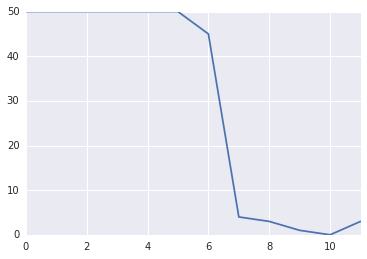

In [20]:
## small k value
## they converge to 3 clusters + noise 
results["0.075-11"].plot()


In [18]:
persistance,label,dimension,deltaframe,index,frames=runDBSCAN(0.075,11, animation="0.075-11")
p=np.vstack(persistance)
x=[]
y=[]
wf=[1,2,3,4,5,6,7,8,9,10,11,12]
for j in wf:
        c=np.unique(p[j-1])
        cc=np.unique(p[j])
        ### assert the same number of clusters
        if len(c)==len(cc):
            y.append(np.count_nonzero(p[j-1]-p[j]))
        else:
            y.append(100)
        
        indx = str(e)+"-"+str(s)
        x = [(interval*x) for x in wf]
        y = [100*x / dimension for x in y]
      
        Results[indx] = y 
        Labels[indx] = label



## Three clusters best fit + Noise evolutions with incremental number of intervals

Yellow data points are evaluated as noise

N>10
Almost stationary core points.
Difference in boundary points


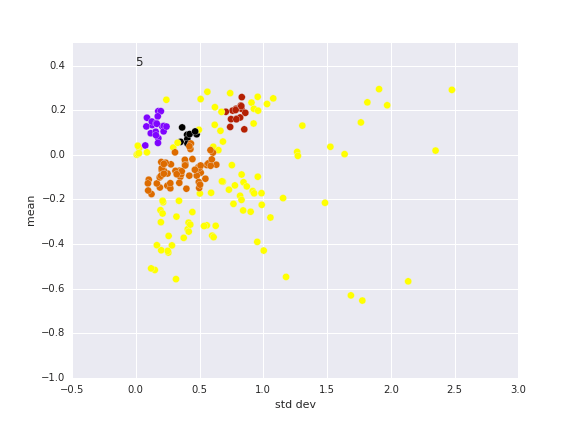

In [19]:
##Image(filename=*) or Image(url=*) by adding a png extension to GIF file
from IPython.display import Image
Image(filename="./Data/animated.gif.png")

## Where it failed?
   
- A substantial number of points clustered as noise
- 80 % accurancy for persistance after 10 or more intervals



### References:



https://www.datascience.com/blog/k-means-alternatives

https://stackoverflow.com/questions/38444619/how-to-create-gifs-with-images-in-python